In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#pd.set_option('display.mpl_style', 'default')
%matplotlib inline

In [3]:
range = pd.date_range('2015-01-01', '2015-12-31', freq='15min')

df = pd.DataFrame(index = range)

In [4]:
df.head()

""
2015-01-01 00:00:00
2015-01-01 00:15:00
2015-01-01 00:30:00
2015-01-01 00:45:00
2015-01-01 01:00:00


In [5]:
# Average speed in miles per hour
df['speed'] = np.random.randint(low=0, high=60, size=len(df.index))

# Distance in miles (speed * 0.5 hours)
df['distance'] = df['speed'] * 0.25 

# Cumulative distance travelled
df['cumulative_distance'] = df.distance.cumsum()

In [7]:
df.head()

,speed,distance,cumulative_distance
2015-01-01 00:00:00,39,9.75,9.75
2015-01-01 00:15:00,2,0.50,10.25
2015-01-01 00:30:00,57,14.25,24.50
2015-01-01 00:45:00,5,1.25,25.75
2015-01-01 01:00:00,47,11.75,37.50


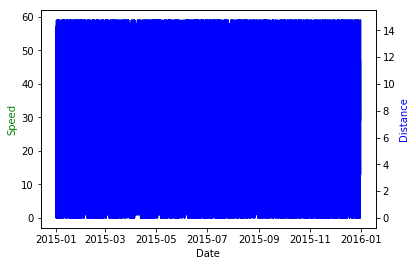

In [8]:
fig, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = 12,5

ax2 = ax1.twinx()
ax1.plot(df.index, df['speed'], 'g-')
ax2.plot(df.index, df['distance'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Speed', color='g')
ax2.set_ylabel('Distance', color='b')

plt.show()


In [10]:
# Not very pretty, far too many data points.

# Let’s start resampling, we’ll start with a weekly summary.

In [9]:
# The resample method in pandas is similar to its groupby method as you are essentially grouping 
# by a certain time span. You then specify a method of how you would like to resample.

In [10]:
# df.speed.resample() will be used to resample the speed column 

# The 'W' indicates we want to resample by week. At the bottom of this post is a 
# summary of different time frames.

# mean() is used to indicate we want the mean speed during this period.

In [11]:
# With distance, we want the sum of the distances over the week to see how far the car travelled over the week, 
# in that case we use sum().

# With cumulative distance we just want to take the last value as it’s a running cumulative total, 
# so in that case we use last().

In [12]:
# Alias	Description
# B 	Business day
# D 	Calendar day
# W 	Weekly
# M 	Month end
# Q 	Quarter end
# A 	Year end
# BA	Business year end
# AS	Year start
# H 	Hourly frequency
# T, min	Minutely frequency
# S 	Secondly frequency
# L, ms	Millisecond frequency
# U, us	Microsecond frequency
# N, ns	Nanosecond frequency

In [13]:
# Method	Description
# bfill  	Backward fill
# count 	Count of values
# ffill 	Forward fill
# first 	First valid data value
# last  	Last valid data values
# max	    Maximum data value
# mean  	Mean of values in time range
# median	Median of values in time range
# min	    Minimum data value
# nunique	Number of unique values
# ohlc  	Opening value, highest value, lowest value, closing value
# pad	    Same as forward fill
# std	    Standard deviation of values
# sum	    Sum of values
# var	    Variance of values

In [14]:
weekly_summary = pd.DataFrame()

weekly_summary['speed'] = df.speed.resample('W').mean()
weekly_summary['distance'] = df.distance.resample('W').sum()
weekly_summary['cumulative_distance'] = df.cumulative_distance.resample('W').last()

#Select only whole weeks
weekly_summary = weekly_summary.truncate(before='2015-01-05', after='2015-12-27')
weekly_summary.head()

,speed,distance,cumulative_distance
2015-01-11,29.282738,4919.50,7580.75
2015-01-18,29.534226,4961.75,12542.50
2015-01-25,28.715774,4824.25,17366.75
2015-02-01,30.069940,5051.75,22418.50
2015-02-08,30.690476,5156.00,27574.50


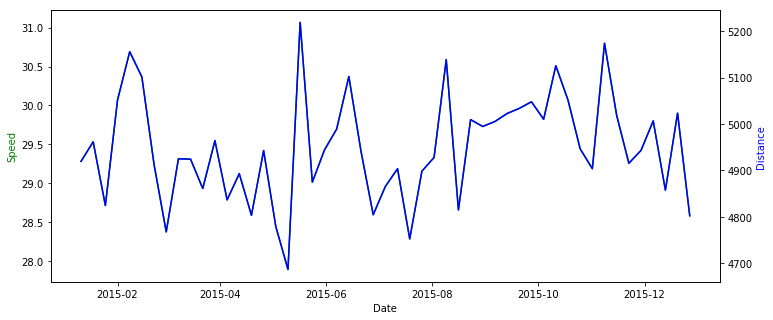

In [15]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(weekly_summary.index, weekly_summary['speed'], 'g-')
ax2.plot(weekly_summary.index, weekly_summary['distance'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Speed', color='g')
ax2.set_ylabel('Distance', color='b')

plt.show()
plt.rcParams['figure.figsize'] = 12,5

In [ ]:
# Much better

# We can do the same thing for an annual summary:

In [16]:
annual_summary = pd.DataFrame()

# AS is year-start frequency
annual_summary['speed'] = df.speed.resample('AS').mean()
annual_summary['distance'] = df.speed.resample('AS').sum()
annual_summary['cumulative_distance'] = df.cumulative_distance.resample('AS').last()

annual_summary

,speed,distance,cumulative_distance
2015-01-01,29.394849,1027203,256800.75
